# Data Cleaning and preprocessing

In [301]:
import pandas as pd

In [302]:
social_media_df = pd.read_csv('twitter_training.csv')

In [303]:
# Exploring no.of rows and columns
social_media_df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [304]:
#Removing Duplicate Rows
social_media_df.drop_duplicates()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [305]:
# Re-Naming the column
social_media_df.rename(columns = {'2401':'Tweet_No'}, inplace = True)
social_media_df.rename(columns = {'Borderlands':'Game_Name'}, inplace = True)
social_media_df.rename(columns = {'Positive':'Sentiment'}, inplace = True)
social_media_df.rename(columns = {'im getting on borderlands and i will murder you all ,':'Tweet'}, inplace = True)

In [306]:
social_media_df

,Tweet_No,Game_Name,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


Text Cleaning

In [307]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize

In [308]:
# Normalizing text
social_media_df['Tweet'] = social_media_df['Tweet'].str.lower()

In [309]:
social_media_df['Tweet'] = social_media_df['Tweet'].astype(str)

In [310]:
# Removing unicode characters
social_media_df['Tweet'] = social_media_df['Tweet'].apply(lambda x: re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z\s])|(\w+:\/\/\S+)|^rt|http.+?", "", x))

In [311]:
# Removing Stopwords
stop = stopwords.words('english')
social_media_df['Tweet'] = social_media_df['Tweet'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))

In [312]:
social_media_df

,Tweet_No,Game_Name,Sentiment,Tweet
0,2401,Borderlands,Positive,coming borders kill
1,2401,Borderlands,Positive,im getting borderlands kill
2,2401,Borderlands,Positive,im coming borderlands murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder
...,...,...,...,...
74676,9200,Nvidia,Positive,realized windows partition mac like 6 years be...
74677,9200,Nvidia,Positive,realized mac window partition 6 years behind n...
74678,9200,Nvidia,Positive,realized windows partition mac 6 years behind ...
74679,9200,Nvidia,Positive,realized windows partition mac like 6 years be...


In [313]:
#Treating the Irrelevant sentiment as neutral
social_media_df['Sentiment'] = social_media_df['Sentiment'].str.replace('Irrelevant', 'Neutral')

In [314]:
social_media_df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [315]:
social_media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_No   74681 non-null  int64 
 1   Game_Name  74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Tweet      74681 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [316]:
#There are some rows where the tweet_no is empty
social_media_df.fillna('Na')

,Tweet_No,Game_Name,Sentiment,Tweet
0,2401,Borderlands,Positive,coming borders kill
1,2401,Borderlands,Positive,im getting borderlands kill
2,2401,Borderlands,Positive,im coming borderlands murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder
...,...,...,...,...
74676,9200,Nvidia,Positive,realized windows partition mac like 6 years be...
74677,9200,Nvidia,Positive,realized mac window partition 6 years behind n...
74678,9200,Nvidia,Positive,realized windows partition mac 6 years behind ...
74679,9200,Nvidia,Positive,realized windows partition mac like 6 years be...


# Exploratory Data Analysis and Visualization

In [317]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [318]:
sns.set_style('darkgrid')

In [319]:
# Setting default parameters
matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [320]:
# Finding the top most games about which people tweeted
game_count = social_media_df.Game_Name.value_counts().head(15)
game_count

Game_Name
TomClancysRainbowSix         2400
MaddenNFL                    2400
Microsoft                    2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Dota2                        2364
NBA2K                        2352
TomClancysGhostRecon         2346
Battlefield                  2346
FIFA                         2340
Name: count, dtype: int64

### Visualization for analyzing the no. of tweets made related to a particular game

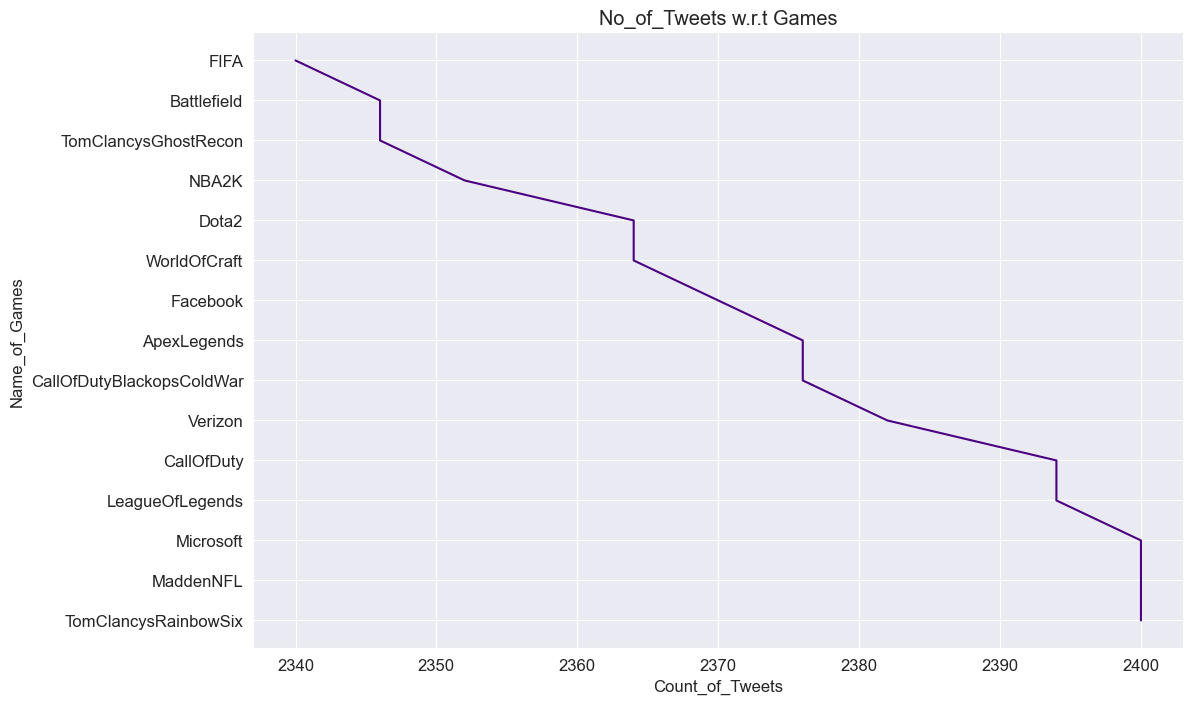

In [376]:
# Line chart
plt.figure(figsize = (12,8))
plt.title('No_of_Tweets w.r.t Games')
plt.plot(game_count, game_count.index, color = 'indigo');
plt.xlabel('Count_of_Tweets');
plt.ylabel('Name_of_Games');

The above Line chart states that most tweets are made related to TomClancysRainbowSix game, MaddenNFL game and Microsoft

### Analyzing the Sentiment Pattern for TomClancysRainbowSix

In [99]:
#Analyzing Sentiments for the TomClancysRainbowSix
TomClancysGhostRecon_df = social_media_df[social_media_df.Game_Name == 'TomClancysGhostRecon']

In [109]:
#Distribution of sentiments for  TomClancysGhostRecon
TomClancysGhostRecon_sentiment = TomClancysGhostRecon_df.Sentiment.value_counts()
TomClancysGhostRecon_sentiment

Sentiment
Negative    900
Neutral     828
Positive    618
Name: count, dtype: int64

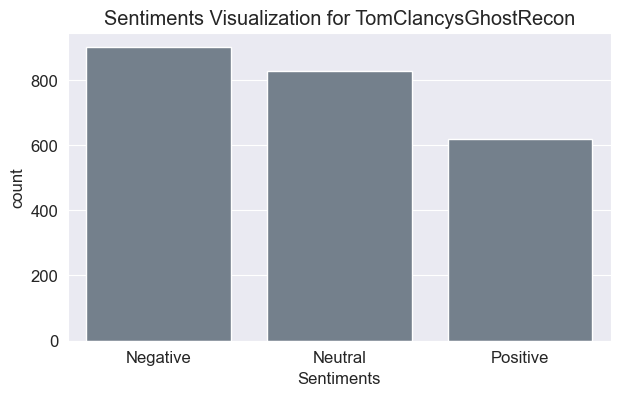

In [390]:
matplotlib.rcParams['font.size'] = 12
plt.figure(figsize = (7, 4))
sns.barplot(x = TomClancysGhostRecon_sentiment.index, y = TomClancysGhostRecon_sentiment, color = 'slategrey');
plt.xlabel('Sentiments');
plt.title('Sentiments Visualization for TomClancysGhostRecon');

From this barplot we can conclue most tweets are made related to TomClancysGhostRecon game and maximum of which infer negative sentiments

### Visualizing the sentiment pattern for three topmost tweeted game

In [292]:
#Extracting three topmost games
top_games = social_media_df['Game_Name'].value_counts().nlargest(3).index

In [326]:
#Extracting the data of this games
df_top_games = social_media_df[social_media_df['Game_Name'].isin(top_games)]

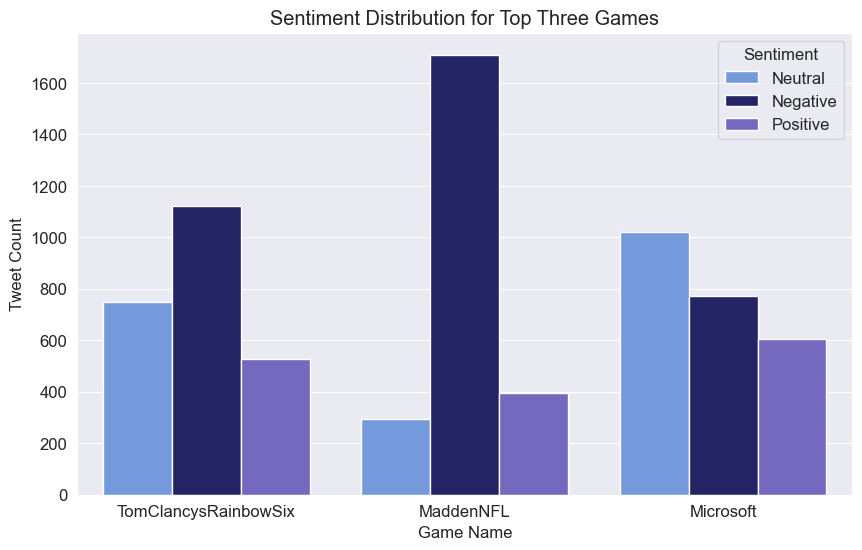

In [384]:
plt.figure(figsize=(10, 6));
custom_palette = {"Positive": "slateblue", "Negative": "midnightblue", "Neutral": "cornflowerblue"}
sns.countplot(x='Game_Name', hue='Sentiment', data=df_top_games, order=top_games, palette = custom_palette);
plt.title('Sentiment Distribution for Top Three Games');
plt.xlabel('Game Name');
plt.ylabel('Tweet Count');

From the above countplot we can conclude that MaddenNFL has maximum negative reviews and same goes for TomClancyRainbowSix. While Microsoft has maximum Neutral reviews

### Finding the game with maximum positive sentiments

In [334]:
positive_sentiments = social_media_df[social_media_df['Sentiment'] == 'Positive']

In [341]:
positive_count = positive_sentiments['Game_Name'].value_counts().head(5)

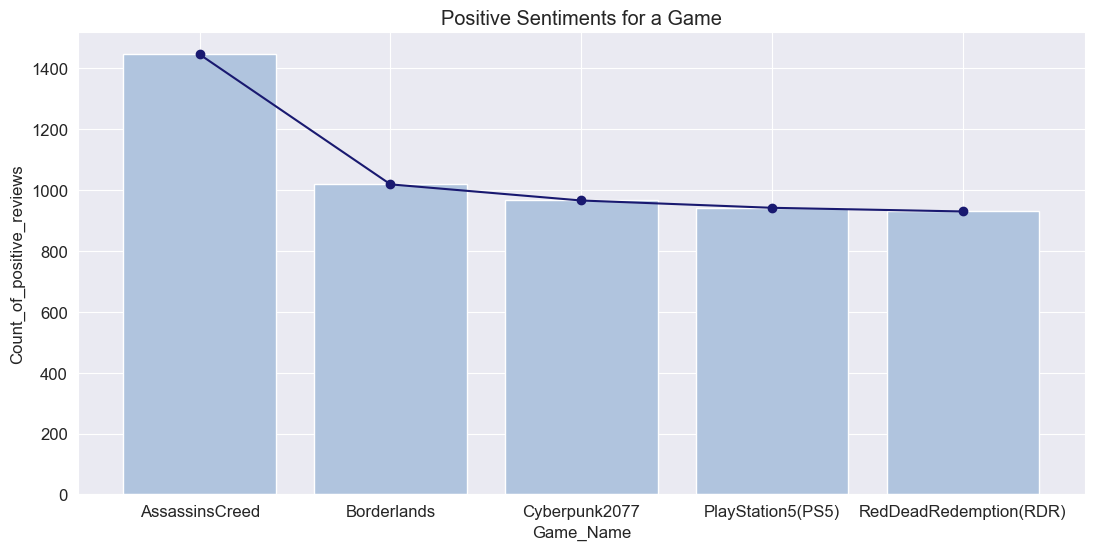

In [388]:
matplotlib.rcParams['font.size'] = 12
plt.figure(figsize = (13, 6))
plt.title('Positive Sentiments for a Game');
plt.plot(positive_count.index, positive_count, 'o-', c='midnightblue');
plt.bar(positive_count.index, positive_count, color = 'lightsteelblue');
plt.xlabel('Game_Name');
plt.ylabel('Count_of_positive_reviews');

Conclusion : From this bar and line chart we can conclude that AssassinsCreed has highest number of positive sentiments followed by Borderlands

### Finding the game with maximum poitive sentiments

In [395]:
negative_sentiments = social_media_df[social_media_df['Sentiment'] == 'Negative']

In [396]:
negative_count = negative_sentiments['Game_Name'].value_counts().head(5)

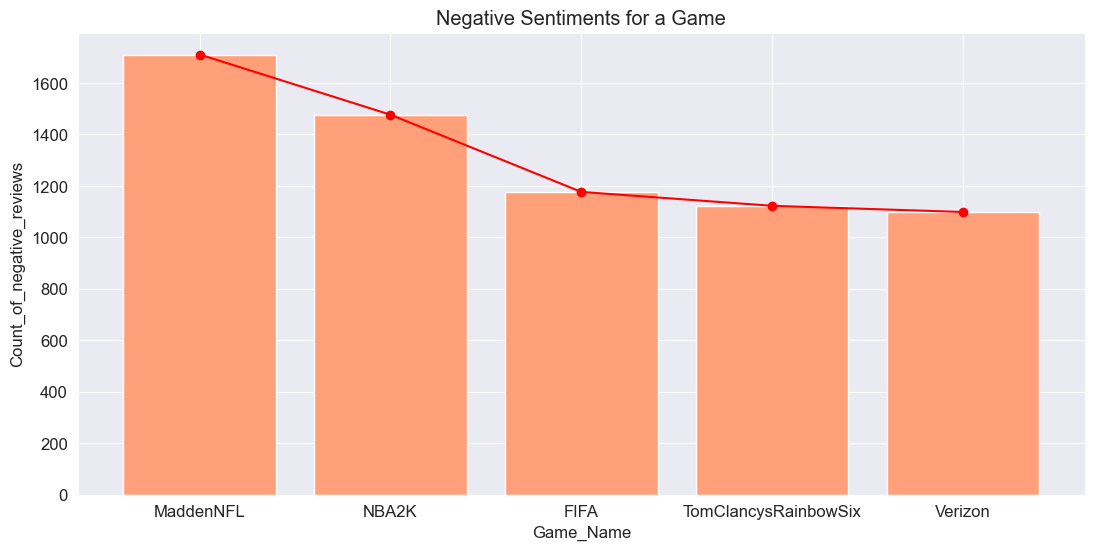

In [399]:
matplotlib.rcParams['font.size'] = 12
plt.figure(figsize = (13, 6))
plt.title('Negative Sentiments for a Game');
plt.plot(negative_count.index, negative_count, 'o-', c='red');
plt.bar(negative_count.index, negative_count, color = 'lightsalmon');
plt.xlabel('Game_Name');
plt.ylabel('Count_of_negative_reviews');

Conclusion : MaddenNFL has highest number of negative reviews